# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [50]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [26]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [27]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [28]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


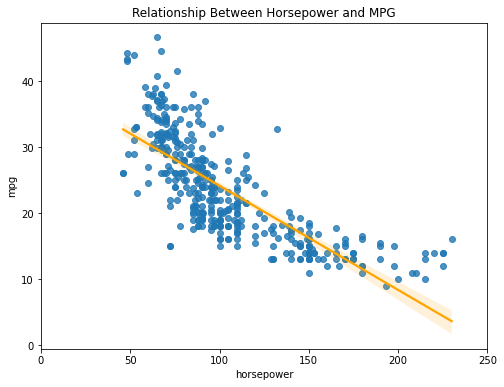

In [29]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [30]:
# call_on_students(1)

#### Answer: 

- plot of showing the RSS vs the slope of mpg vs horsepower


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [31]:
# call_on_students(1)

- Gradient decent looks at the derivative, and steps down the curve in smaller steps as the gradient approaches zero.

- Residuals decrease

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [32]:
# call_on_students(1)

#### Answer: 

- Step size is referring to the distance the gradient steps down when approaching the bottom of the curve.
- ANS: step size tells us how much you want to change your slope

- The learning rate(alpha?) regulates step size proportional to the gradient. (larger step size for larger gradient)
- ANS: learning rate regulates step size by determining how large those step sizes are according to the gradient


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [33]:
# call_on_students(1)

#### Answer: 

- A logistic regression model is used for a classification(categorical) target.
- A logistic regression model outputs the predicted classification for a given input, and the probability of the input being in that class.
- Linear regression predicts an output value, while logistic regression squeezes the prediction to predict an output class.
- Logistic regression is a parametric model.

ANS:
- categorical
- predicts on log odds(p/1-p) --> probability --> 1 or 0
- logistic: class variable, linear: continuous variable


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [34]:
# call_on_students(1)

#### Answer: 

logistic regression vs decision tree

- Logistic regression: good for fitting into classes, helpful to see probability, simple to interpret, fast run-time, not prone to overfitting


- Decision tree: captures non-linear, fast, easy to interpret
- Random forests and boosting models handle imabalanced datasets better


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [35]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [36]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [37]:
# call_on_students(1)
X = mpg_class.drop(columns='target')
y = mpg_class.target

In [38]:
# Train-test split
# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [39]:
# Scale the data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train, y_train)
X_test_sc = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [40]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [41]:
# Code to explore
mpg_class.target.describe()

count    392.000000
mean       0.252551
std        0.435031
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [42]:
mpg_class.target.value_counts(normalize=True)

0    0.747449
1    0.252551
Name: target, dtype: float64

#### Answer:

- Breakdown is: 0=0.75, 1=0.25


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- A model-less baseline would predict 0 for all inputs, as 0 is the majority class.


#### Part 3: How accurate would that baseline be on test data?


In [43]:
# Code to find the answer
mpg_class.target.value_counts(normalize=True)

0    0.747449
1    0.252551
Name: target, dtype: float64

#### Answer:

- A model-less baseline would be 75% accurate, predicting 0 for all inputs.


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [44]:
# call_on_students(1)

#### Answer:

- Based on this breakdown, '1' class could be considered a minority class that needs adjustment by oversampling the minority class, bootstrapping, or with SMOTE.
- ANS: imbalance. Could use SMOTE.


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [45]:
# call_on_students(1)

In [46]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42).fit(X_train_sc, y_train)

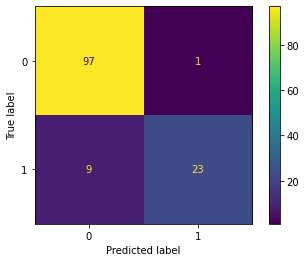

In [47]:
# Plot a confusion matrix on the test data
# plot_confusion_matrix(cred_model, X_test_sc, y_test);
plot_confusion_matrix(logreg, X_test_sc, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [51]:
y_pred = logreg.predict(X_test_sc)
cm_1 = confusion_matrix(y_test, y_pred)
tn = cm_1[0, 0]
fp = cm_1[0, 1]
fn = cm_1[1, 0]
tp = cm_1[1, 1]

In [52]:
# Accuracy
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)

0.9230769230769231


In [56]:
# Accuracy w/ sklearn
accuracy_score(y_test, y_pred)

0.9230769230769231

In [53]:
# Precision
prec = tp / (tp + fp)
print(prec)

0.9583333333333334


In [57]:
# Precision w/ sklearn
precision_score(y_test, y_pred)

0.9583333333333334

In [54]:
# Recall
rec = tp / (tp + fn)
print(rec)

0.71875


In [58]:
# Recall w/ sklearn
recall_score(y_test, y_pred)

0.71875

In [55]:
# F1 Score
f1_score = 2*prec*rec / (prec + rec)
print(f1_score)

0.8214285714285714


In [61]:
# F1 w/ sklearn
f1_score(y_test, y_pred)

TypeError: 'numpy.float64' object is not callable

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [66]:
# Calculate roc-auc
y_prob = logreg.predict_proba(X_test_sc)
y_hat_hd = y_prob[:, 1]
roc_auc_score(y_test, y_hat_hd)

0.9811862244897959

In [67]:
roc_auc_score(y_test, logreg.decision_function(X_test_sc))

0.9811862244897959

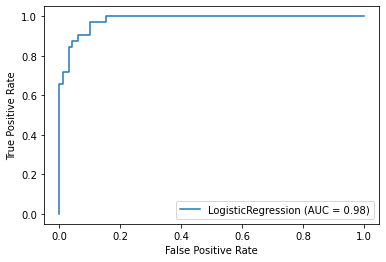

In [63]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_sc, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- good metric performance
- FN > FP as show by better precision score than recall


- Our model does a good job(high accuracy)
- recall is lower, something to work on


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [68]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

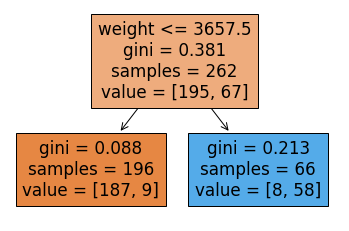

In [69]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

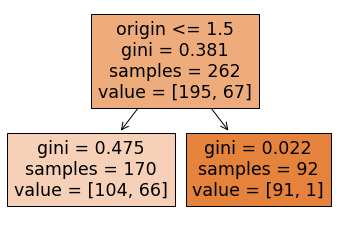

In [70]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Version 1: lower gini sum of leafs AKA lower homogeniety


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [71]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42).fit(X_train_sc, y_train)

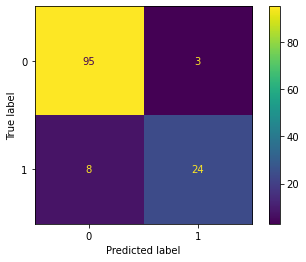

In [72]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_sc, y_test);

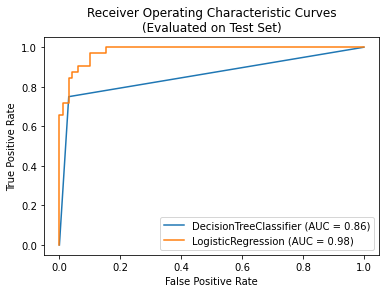

In [74]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_sc, y_test, ax=ax)
plot_roc_curve(logreg, X_test_sc, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- According to the ROC-AUC score, the logistic regression model is better as it explains more of the test data more accurately.(?)
- ANS: as a classifier, its the probability that the model marks an unknown point correctly
agg measure of performance
TP vs FP.
